In [1]:
import numpy as np
from matplotlib import pyplot as plt

## Data Generation part

In [2]:
# define a function to generate experimental data.
# Input args: m,n are matrix shape; mu and sigma are for noise data.
def data_generator(m,n,mu, sigma):
    # A is a matrix with size R^{m*n}
    
    A = np.empty([m,n])
    # ground truth 
    # Note that actually z is not in the feasbile set (probability simplex). Which means the loss value 
    # may not be very small even after thousands iterations.
    z = 5*np.random.rand(n,1)
    
    # create noise vector with the length equals to m
    for i in range(m):
        for j in range(n):
            A[i,j] = np.random.normal(mu, 1)
        norm_A_i = np.linalg.norm(A[i,:],2)
        # scale each row of A such that the norm of each row is equal to 1.
        A[i,:] = A[i,:]/norm_A_i
    delta = np.random.normal(mu, sigma, size=(m,1))
    return A, z, delta
    

In [3]:
# Specify m, n
m = 500
n = 100
# Specify the mean and variance of noise \delta, which follows normal distribution.
mu = 0
# This can be changed.
sigma = 0.8
np.random.seed(1234)


In [12]:
A, z, delta = data_generator(m,n,mu,sigma)
# generate observations
b = np.matmul(A,z)+delta
# check about A,z,b's shape
print(A.shape)
print(z.shape)
print(delta.shape)
print(b.shape)
print(np.linalg.norm(A[1,:],2))
print(A.shape[0])

(500, 100)
(100, 1)
(500, 1)
(500, 1)
1.0
500


## Least Square Model Setup

In [5]:
# define a function compute least square loss function value.
def least_square(A,x,b):
    residual = np.matmul(A,x)-b
    loss = 0.5*np.linalg.norm(residual,2)**2
    return loss

In [6]:
# define a function compute gradient
def least_square_grad(A,x,b):
    residual = np.matmul(A,x)-b
    # gradient is A^T(Ax-b)
    grad = np.matmul(np.transpose(A),residual)
    return grad

In [7]:
# This function performs one iteration of bregman iterations
def bregman_update(A,x,b,eta):
    size = x.shape[0]
    grad = least_square_grad(A,x,b)
    #count = 0
    breg_grad = []
    for i in range(size):
        # numerator of the formula in the homework
        breg_up = x[i]*np.exp(-eta*grad[i])
        breg_grad.append(breg_up)
    breg_grad = np.asarray(breg_grad)
        
    return breg_grad/np.sum(breg_grad)
    

In [8]:
# This function applies projection operator on a given vector.
def proj_grad(y):
    size = y.shape[0]
    y = np.resize(y,(size,))
    y_hat = np.sort(y)[::-1]
    #count = 0
    numerator = np.cumsum(y_hat)-1
    index = np.arange(size)+1
    condition =  y_hat - numerator/index > 0
    rho = index[condition][-1]
    t = numerator[condition][-1] / float(rho)
    w = np.maximum(y-t,0)
    return np.resize(w,(size,1))

## Algorithm Test

In [23]:
## This is test code for mirror descent.
lr = 0.05
x0 = z+np.random.normal(1,1,size = (z.shape[0],z.shape[1]))
x_storage = x0
x0 = x0/np.sum(x0)
#print(x0)
max_iter = 5000
obj_val = np.empty(0)
initial_val = least_square(A,x0,b)
obj_val = np.append(obj_val,initial_val)
print(obj_val)
for j in range(max_iter):
    x0 = bregman_update(A,x0,b,lr)
    loss = least_square(A,x0,b)
    obj_val = np.append(obj_val,loss)
#print(x0.shape)
print(np.sum(x0))



[2307.7043198]
1.0


In [24]:
## This is the test code for project gradient descent.
lr1 = 0.05
x1 = x_storage
x1 = x1/np.sum(x1)
#print(np.sum(x1))
#print(x1)
max_iter = 5000
obj_val1 = np.empty(0)
initial_val1 = least_square(A,x1,b)
obj_val1 = np.append(obj_val1,initial_val1)
print(obj_val1)
for j in range(max_iter):
    grad = least_square_grad(A,x1,b)
    x1_hat = x1 - lr1*grad
    x1 = proj_grad(x1_hat)
    
    loss = least_square(A,x1,b)
    obj_val1 = np.append(obj_val1,loss)
#print(x1.shape)
# Just check if it is sucessfully projected into probability simplex.
print(np.sum(x1))

[2307.7043198]
0.9999999999999996


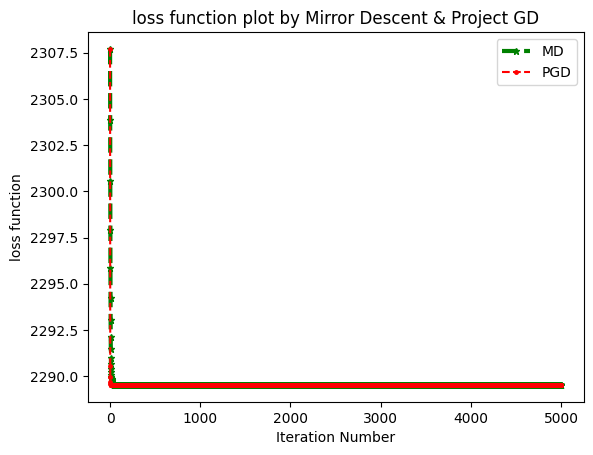

In [34]:
plt.plot(obj_val, color='green', marker='*', linestyle='dashed',
...      linewidth=3, markersize=5,label = 'MD')
plt.plot(obj_val1, color='red', marker='o', linestyle='dashed',
...      linewidth=1.5, markersize=2.5,label = 'PGD')
plt.legend()
plt.xlabel('Iteration Number')
plt.ylabel('loss function')
plt.title('loss function plot by Mirror Descent & Project GD')
plt.savefig("Visualization of loss function by mirror descent", dpi = 150)

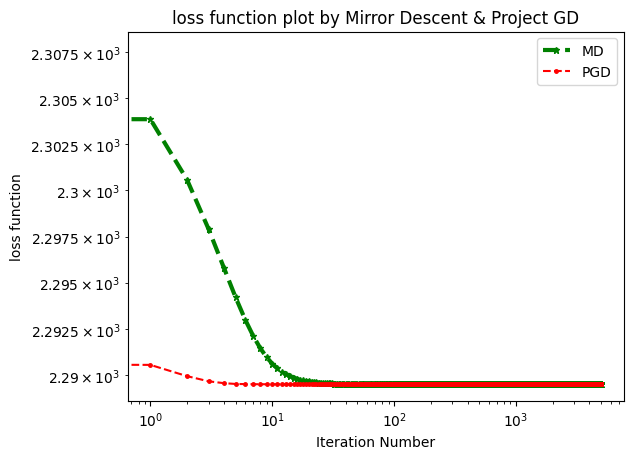

In [35]:
plt.loglog(obj_val, color='green', marker='*', linestyle='dashed',
...      linewidth=3, markersize=5,label = 'MD')
plt.loglog(obj_val1, color='red', marker='o', linestyle='dashed',
...      linewidth=1.5, markersize=2.5,label = 'PGD')
plt.legend()
plt.xlabel('Iteration Number')
plt.ylabel('loss function')
plt.title('loss function plot by Mirror Descent & Project GD')
plt.savefig("Visualization of loss function by mirror descent", dpi = 150)